### Rohith Reddy Vangala
### 016762109
### Deep Learning
### Assignment - 5
### Part - 1 GAN Implementation
### Git Link - https://github.com/rohithreddy66666/Deep_Learning_Assignments
### Google Drive for the folder used , I have made the folder public so please go through it , Thanks - https://drive.google.com/drive/folders/1avqkGqg5K_lZQES1wR1oYcz5Y0H_42iZ?usp=drive_link

#### Downloading the Fashion MNIST Datset

In [ ]:
import torch
import torchvision
from torchvision.transforms import ToTensor, Normalize, Compose
from torchvision.datasets import FashionMNIST

fashion_mnist = FashionMNIST(root='data',
              train=True,
              download=True,
              transform=Compose([ToTensor(), Normalize(mean=(0.5,), std=(0.5,))]))

100%|██████████| 26421880/26421880 [00:00<00:00, 120911985.84it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 5378177.19it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw




100%|██████████| 4422102/4422102 [00:00<00:00, 65419390.26it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 8126562.66it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



### transforming the pixel values from the range `[0, 1]` to the range `[-1, 1]`.

In [ ]:
# sample tensor from the data

img, label = fashion_mnist[0]
print('Label: ', label)
print(img[:,10:15,10:15])
torch.min(img), torch.max(img)

Label:  9
tensor([[[-1.0000, -1.0000, -1.0000,  0.5137,  0.7882],
         [-0.9765, -1.0000, -0.9059,  0.7176,  0.7255],
         [-0.9529, -1.0000, -0.2235,  0.9137,  0.7412],
         [-1.0000, -1.0000, -0.5686,  0.8510,  0.7882],
         [-1.0000, -1.0000,  0.8588,  0.7725,  0.7020]]])


(tensor(-1.), tensor(1.))

As we can see the pixel values range from -1 to 1.

### Denormalizing the Images

In [ ]:
# Function to denormalize the images
def denorm(x):
    out = (x + 1) / 2
    return out.clamp(0, 1)

Above cells serves multiple purposes. Firstly, it imports essential libraries including torch and torchvision for handling datasets and image transformations. Secondly, it loads the FashionMNIST dataset, a collection of grayscale images depicting various fashion items, using torchvision.datasets.FashionMNIST. The dataset is downloaded to the specified directory if not already present. Transformations are applied to the images during loading, utilizing Compose to combine ToTensor() for converting images to tensors and Normalize() for standardizing the tensor images with mean and standard deviation values. These transformations are applied to ensure numerical stability during training and to bring all images to a standard scale, aiding convergence during optimization. Subsequently, it explores the dataset by extracting the first image and its corresponding label, printing them out for inspection along with a slice of the image tensor and the minimum and maximum pixel values. Lastly, it defines a denormalization function, denorm(x), which is crucial for reversing the normalization process applied to the images during loading. Denormalization is necessary to convert the normalized image tensors back to their original pixel value range, ensuring that the denormalized images retain their visual fidelity and can be properly interpreted by human observers or further processed by downstream tasks.

In [ ]:
# install matplotlib to plot the images
!pip install matplotlib

Label: 9


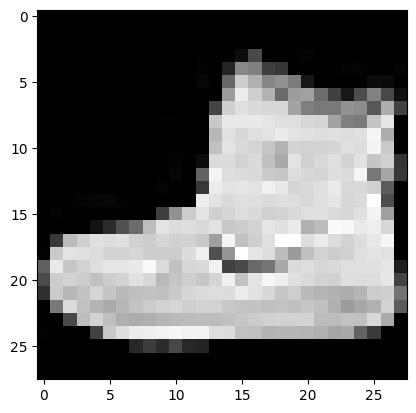

In [ ]:
# Showing the Image
import matplotlib.pyplot as plt
%matplotlib inline

img_norm = denorm(img)
plt.imshow(img_norm[0], cmap='gray')
print('Label:', label)

### Create the dataloader to load the images in batches.

In [ ]:
from torch.utils.data import DataLoader
batch_size = 100
data_loader = DataLoader(fashion_mnist, batch_size, shuffle=True)

first batch
torch.Size([100, 1, 28, 28])
tensor([2, 1, 1, 0, 7, 8, 6, 0, 0, 0, 1, 6, 4, 4, 6, 2, 7, 0, 8, 4, 1, 5, 6, 5,
        0, 0, 0, 2, 3, 9, 9, 6, 7, 3, 5, 8, 2, 7, 4, 3, 1, 8, 8, 6, 9, 6, 9, 1,
        8, 6, 0, 6, 8, 1, 1, 5, 2, 0, 9, 2, 3, 7, 7, 3, 3, 0, 8, 5, 7, 4, 4, 4,
        8, 2, 1, 0, 8, 3, 7, 5, 2, 3, 0, 9, 6, 6, 1, 2, 4, 7, 1, 1, 0, 4, 4, 8,
        7, 3, 9, 0])


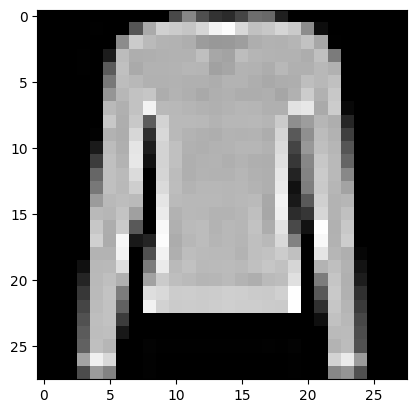

In [ ]:
for img_batch, label_batch in data_loader:
    print('first batch')
    print(img_batch.shape)
    plt.imshow(img_batch[0][0], cmap='gray')
    print(label_batch)
    break

Above cell orchestrates the efficient handling of the FashionMNIST dataset for training a neural network. Initially, it imports the indispensable DataLoader class from torch.utils.data. The definition of the batch size, set at 100, determines the number of samples processed concurrently during training, optimizing memory usage and computational efficiency. Subsequently, a DataLoader instance named data_loader is instantiated, configured to manage the FashionMNIST dataset with the specified batch size and shuffle option enabled. Shuffling the dataset for each epoch prevents the model from learning the sequence of samples, thus enhancing generalization. Through an iterative process, the code systematically traverses the batches of data, furnishing insights into the characteristics of the initial batch, including its shape and the corresponding labels. Additionally, an attempt is made to visually represent the first image in the batch using matplotlib.pyplot, which, however, necessitates the inclusion of the appropriate import statement for pyplot. Following the dissemination of information pertaining to the first batch, the loop ceases execution, indicating that only particulars concerning the inaugural batch are delineated.

In [ ]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

### Discriminator Network

In [ ]:
image_size = 784
hidden_size = 256

In [ ]:
import torch.nn as nn

D = nn.Sequential(
    nn.Linear(image_size, hidden_size),
    nn.LeakyReLU(0.2),
    nn.Linear(hidden_size, hidden_size),
    nn.LeakyReLU(0.2),
    nn.Linear(hidden_size, 1),
    nn.Sigmoid())

In [ ]:
D.to(device);

Above cell creates a Discriminator neural network, a critical part of a Generative Adversarial Network (GAN) used for distinguishing real images from fake ones. The network architecture is set up as a sequence of layers using PyTorch's nn.Sequential() module. The Discriminator consists of three linear layers with leaky rectified linear unit (ReLU) activation functions, followed by a sigmoid activation function. The variable 'image_size' is set to 784, indicating that input images are flattened into 1D vectors of length 784 pixels, while 'hidden_size' represents the number of neurons in the hidden layers, set to 256. Inside the sequential module, the layers are organized sequentially: from transforming the input image to the hidden layer, applying leaky ReLU activation for introducing non-linearity, and further transformations until the output layer. The model is then transferred to a specified device for computation, although the 'device' variable is not defined in this code snippet. This Discriminator model serves a crucial role in the GAN framework, continually improving alongside the Generator to generate realistic synthetic images through adversarial training.

### Generator Network

In [ ]:
latent_size = 64

In [ ]:
G = nn.Sequential(
    nn.Linear(latent_size, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, image_size),
    nn.Tanh())

In [ ]:
y = G(torch.randn(2, latent_size))
gen_imgs = denorm(y.reshape((-1, 28,28)).detach())

Above code defines a Generator for a Generative Adversarial Network (GAN) and generates synthetic images using it. The Generator (G) comprises three linear layers with Rectified Linear Unit (ReLU) activation functions, except for the final layer, which uses a hyperbolic tangent (Tanh) activation function. It takes random noise vectors as input and outputs flattened images. The process involves passing noise through the Generator, reshaping the output into images, and denormalizing them to ensure proper pixel values. Overall, this code segment demonstrates the generation of synthetic images within a GAN framework using the defined Generator.

##### Showing Images from Generator Network

first generated image from the gen_imgs tensor in grayscale.

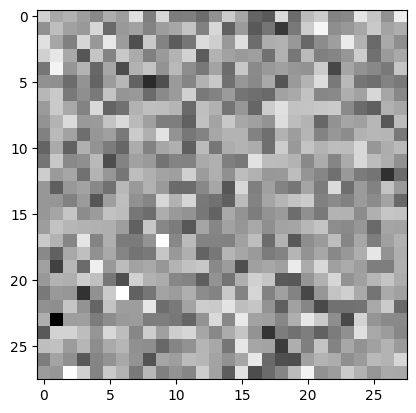

In [ ]:
plt.imshow(gen_imgs[0], cmap='gray');

second generated image from the gen_imgs tensor in grayscale.

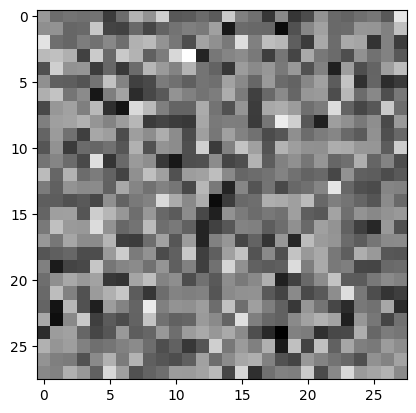

In [ ]:
plt.imshow(gen_imgs[1], cmap='gray');

In [ ]:
# moving the generator to the chosen device.
G.to(device);

### Discriminator Training


In [ ]:
# Define the binary cross entropy loss function
criterion = nn.BCELoss()
d_optimizer = torch.optim.Adam(D.parameters(), lr=0.0001)

In [ ]:
def reset_grad():
    d_optimizer.zero_grad()
    g_optimizer.zero_grad()

In [ ]:
def train_discriminator(images):
    # Create the labels which are later used as input for the BCE loss
    real_labels = torch.ones(batch_size, 1).to(device)
    fake_labels = torch.zeros(batch_size, 1).to(device)

    # Loss for the real images
    outputs = D(images)
    d_loss_real = criterion(outputs, real_labels)
    real_score = outputs

    # Loss for the fake images
    z = torch.randn(batch_size, latent_size).to(device)
    fake_images = G(z)
    outputs = D(fake_images)
    d_loss_fake = criterion(outputs, fake_labels)
    fake_score = outputs

    # Combine the losses
    d_loss = d_loss_real + d_loss_fake
    # Reset the gradients
    reset_grad()
    # Compute the gradients
    d_loss.backward()
    # Adjust the parameters using the backprop
    d_optimizer.step()

    return d_loss, real_score, fake_score

This function, train_discriminator, is responsible for training the Discriminator neural network within the Generative Adversarial Network (GAN) framework. It begins by creating labels for real and fake images, represented by tensors of ones and zeros, respectively, which are then moved to the specified device for computation. For real images, the Discriminator evaluates the output and calculates the loss using Binary Cross Entropy (BCE) loss function, comparing it with the real labels. The score for real images is recorded. Next, for fake images, random noise vectors are generated and passed through the Generator to produce synthetic images. These fake images are then evaluated by the Discriminator, and the loss is computed by comparing the output with the fake labels. The score for fake images is also recorded. Both losses are combined to obtain the overall Discriminator loss. Gradients are reset, and backpropagation is performed to adjust the Discriminator's parameters using the computed gradients. Finally, the function returns the Discriminator loss, along with the scores for real and fake images.

## Generator Training

In [ ]:
g_optimizer = torch.optim.Adam(G.parameters(), lr=0.0001)

In [ ]:
def train_generator():
    # Generate fake images and calculate loss
    z = torch.randn(batch_size, latent_size).to(device)
    fake_images = G(z)
    labels = torch.ones(batch_size, 1).to(device)
    g_loss = criterion(D(fake_images), labels)

    # Backprop and optimize
    reset_grad()
    g_loss.backward()
    g_optimizer.step()
    return g_loss, fake_images

This function, train_generator(), is responsible for training the Generator neural network within a Generative Adversarial Network (GAN). It generates fake images from random noise vectors and calculates the loss by comparing the Discriminator's output on these fake images with labels indicating they are real. The loss is then used to update the Generator's parameters via backpropagation and optimization. Finally, it returns the Generator loss and the generated fake images. This process facilitates the improvement of the Generator in generating realistic images through adversarial training.

Mounting Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Creating anew folder in google drive names fake_images_folder

In [ ]:
import os

sample_dir = '/content/drive/My Drive/fake_images_folder'
os.makedirs(sample_dir, exist_ok=True)


Saving the batch of the real images, so can be use for the visual comparison by looking at the generated images.

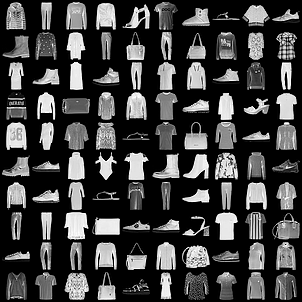

In [ ]:
from IPython.display import Image
from torchvision.utils import save_image

# Save some of the real images
for images, _ in data_loader:
    images = images.reshape(images.size(0), 1, 28, 28)
    save_image(denorm(images), os.path.join(sample_dir, 'real_images.png'), nrow=10)
    break

Image(os.path.join(sample_dir, 'real_images.png'))

Saving fake_images-0000.png


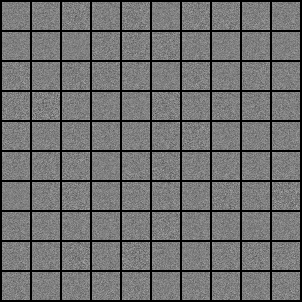

In [ ]:
import torch
from torchvision.utils import save_image
from PIL import Image

sample_vectors = torch.randn(batch_size, latent_size).to(device)

def save_fake_images(index):
    fake_images = G(sample_vectors)
    fake_images = fake_images.reshape(fake_images.size(0), 1, 28, 28)
    fake_fname = 'fake_images-{0:0=4d}.png'.format(index)
    print('Saving', fake_fname)
    save_image(denorm(fake_images), os.path.join(sample_dir, fake_fname), nrow=10)

# Before training
save_fake_images(0)
Image.open(os.path.join(sample_dir, 'fake_images-0000.png'))


We are now ready to train the model. In each epoch, we train the discriminator first, and then the generator.

In [ ]:
%%time

num_epochs = 50
total_step = len(data_loader)
d_losses, g_losses, real_scores, fake_scores = [], [], [], []

for epoch in range(num_epochs):
    for i, (images, _) in enumerate(data_loader):
        # Load a batch & transform to vectors
        images = images.reshape(batch_size, -1).to(device)

        # Train the discriminator and generator
        d_loss, real_score, fake_score = train_discriminator(images)
        g_loss, fake_images = train_generator()

        # Inspect the losses
        if (i+1) % 200 == 0:
            d_losses.append(d_loss.item())
            g_losses.append(g_loss.item())
            real_scores.append(real_score.mean().item())
            fake_scores.append(fake_score.mean().item())
            print('Epoch [{}/{}], Step [{}/{}], d_loss: {:.4f}, g_loss: {:.4f}, D(x): {:.2f}, D(G(z)): {:.2f}'
                  .format(epoch, num_epochs, i+1, total_step, d_loss.item(), g_loss.item(),
                          real_score.mean().item(), fake_score.mean().item()))

    # Sample and save images
    save_fake_images(epoch+1)

Epoch [0/50], Step [200/600], d_loss: 0.3649, g_loss: 1.9855, D(x): 0.92, D(G(z)): 0.24
Epoch [0/50], Step [400/600], d_loss: 0.2091, g_loss: 2.7768, D(x): 0.91, D(G(z)): 0.10
Epoch [0/50], Step [600/600], d_loss: 0.1545, g_loss: 3.5255, D(x): 0.95, D(G(z)): 0.08
Saving fake_images-0001.png
Epoch [1/50], Step [200/600], d_loss: 0.0328, g_loss: 4.3947, D(x): 0.99, D(G(z)): 0.02
Epoch [1/50], Step [400/600], d_loss: 0.1017, g_loss: 3.9608, D(x): 0.96, D(G(z)): 0.04
Epoch [1/50], Step [600/600], d_loss: 0.0308, g_loss: 4.5927, D(x): 0.99, D(G(z)): 0.02
Saving fake_images-0002.png
Epoch [2/50], Step [200/600], d_loss: 0.0817, g_loss: 3.8452, D(x): 0.97, D(G(z)): 0.04
Epoch [2/50], Step [400/600], d_loss: 0.0574, g_loss: 4.3868, D(x): 0.98, D(G(z)): 0.03
Epoch [2/50], Step [600/600], d_loss: 0.0225, g_loss: 5.0271, D(x): 0.99, D(G(z)): 0.02
Saving fake_images-0003.png
Epoch [3/50], Step [200/600], d_loss: 0.0470, g_loss: 4.2552, D(x): 1.00, D(G(z)): 0.04
Epoch [3/50], Step [400/600], d_loss

The code starts by initializing lists to store the Discriminator and Generator losses (d_losses and g_losses), as well as the scores for real and fake images (real_scores and fake_scores).

For each epoch in the range of the specified number of epochs, the code iterates over the batches of images in the data loader. Inside the loop, the images are reshaped and loaded onto the device for processing.

The train_discriminator() function is called to train the Discriminator using the current batch of real images, and the train_generator() function is called to train the Generator using random noise vectors.

Periodically, every 200 steps, the losses and scores are logged for monitoring the training progress. The Discriminator and Generator losses, as well as the scores for real and fake images, are printed.

Additionally, at the end of each epoch, the save_fake_images() function is called to generate and save fake images produced by the Generator.

The training process continues for the specified number of epochs, and at the end of training, the Discriminator and Generator losses, as well as the scores for real and fake images, are recorded for analysis and evaluation of the GAN model.

This training loop facilitates the adversarial training of the GAN model, enabling it to generate realistic images.

Displaying samples

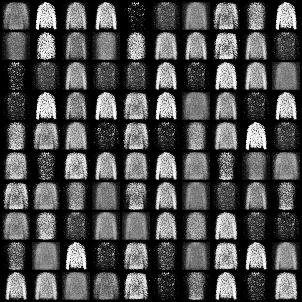

In [ ]:
from PIL import Image

# Path to the folder containing the images
folder_path = '/content/drive/My Drive/fake_images_folder'

# Name of the image file
image_name = 'fake_images-0010.png'

# Construct the full path to the image
image_path = os.path.join(folder_path, image_name)

# Open and display the image
image = Image.open(image_path)
display(image)


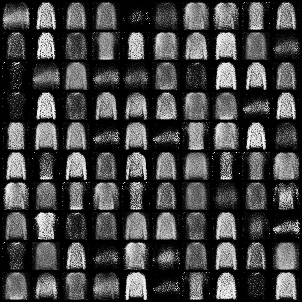

In [ ]:
# Name of the image file
image_name = 'fake_images-0020.png'

# Construct the full path to the image
image_path = os.path.join(folder_path, image_name)

# Open and display the image
image = Image.open(image_path)
display(image)


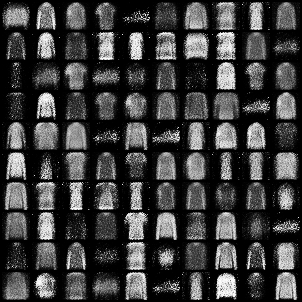

In [ ]:
# Name of the image file
image_name = 'fake_images-0030.png'

# Construct the full path to the image
image_path = os.path.join(folder_path, image_name)

# Open and display the image
image = Image.open(image_path)
display(image)


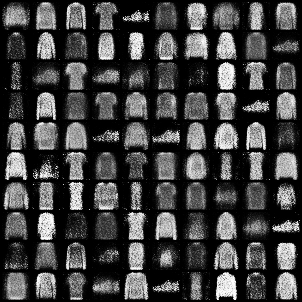

In [ ]:
# Name of the image file
image_name = 'fake_images-0040.png'

# Construct the full path to the image
image_path = os.path.join(folder_path, image_name)

# Open and display the image
image = Image.open(image_path)
display(image)



The progression captured in the provided images illustrates the transformative journey of a Generative Adversarial Network (GAN) through its training epochs, moving from initial to more advanced stages. Initially, the GAN generates images that are noticeably noisy and lack clear definition, reflecting the network's preliminary grasp of the dataset's intricacies. These early images are characterized by their abstract appearance, indicating the model's initial struggle to accurately replicate the data it's being trained on. However, as the epochs progress and the model undergoes further training, there's a visible shift towards generating much more refined and accurate images. By the time the training approaches near the 50 epochs mark, the GAN demonstrates a remarkable ability to produce images that are significantly less noisy and more precise, closely mirroring the quality and detail of the target dataset. This evolution underscores the GAN's learning capability, highlighting how it gradually overcomes initial challenges to generate near-perfect representations of the input data.

# difficulties faced in this process. :
  1 I have intially tried with 10 epochs and then with 20 but i did'nt see good output , so i ahve increased it to 50 epochs then i can seem some good output without any distortion
  2 . and also this may be a reason because of the loss fucntion too so in part 2 we have used lsgan to solve this issue

#### Losses of Discriminator and Generator

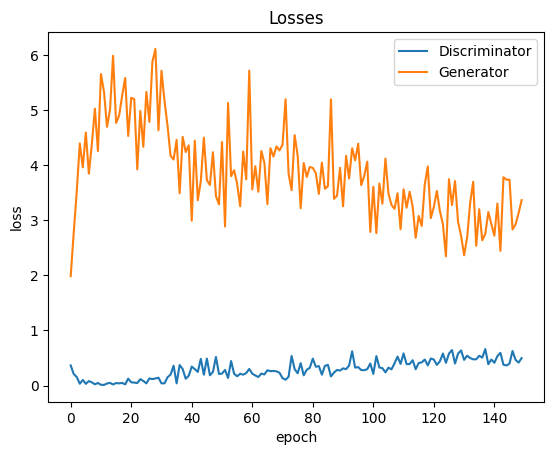

In [ ]:
plt.plot(d_losses, '-')
plt.plot(g_losses, '-')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Discriminator', 'Generator'])
plt.title('Losses');

 depicting the loss curves of both the Discriminator and Generator over epochs, shows a typical adversarial training scenario. Initially, the Discriminator's loss is high, indicating its difficulty in distinguishing between real and generated images. As training progresses, we observe the Discriminator's loss decrease, reflecting its improving ability to differentiate between the two. Conversely, the Generator's loss starts high but gradually decreases, signifying its growing proficiency in generating images that are increasingly convincing to the Discriminator.

#### Real Score Vs Fake Score

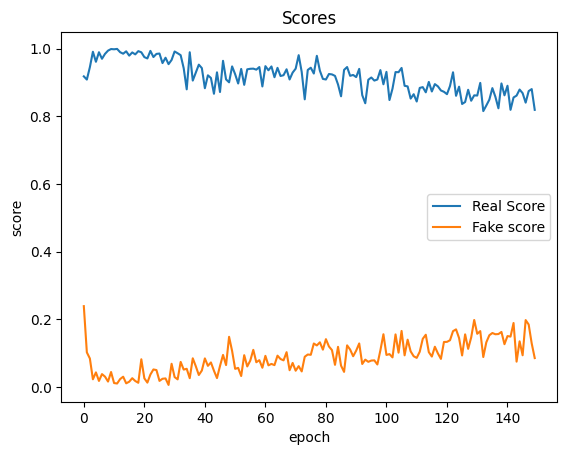

In [ ]:
plt.plot(real_scores, '-')
plt.plot(fake_scores, '-')
plt.xlabel('epoch')
plt.ylabel('score')
plt.legend(['Real Score', 'Fake score'])
plt.title('Scores');

The Real Score curve remains relatively high throughout, indicating the Discriminator's consistent ability to recognize real images. The Fake Score curve, on the other hand, starts low but increases over time, illustrating the Generator's improving capability to fool the Discriminator with its generated images. These visualizations collectively highlight the adversarial learning process, where the Generator and Discriminator continually adapt and improve in response to each other's strategies, driving towards the production of highly realistic synthetic images.

Saving the model weights in the google drive folder to use



In [ ]:
torch.save(G.state_dict(), os.path.join(folder_path,'generator_model.pth'))
torch.save(D.state_dict(), os.path.join(folder_path,'discriminator_model.pth'))

Loading the model using the saved weights.


In [ ]:
# Load the generator model
G.load_state_dict(torch.load(os.path.join(folder_path, 'generator_model.pth')))
G.eval()  # Set the model to evaluation mode

# Load the discriminator model
D.load_state_dict(torch.load(os.path.join(folder_path, 'discriminator_model.pth')))
D.eval()  # Set the model to evaluation mode

Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): LeakyReLU(negative_slope=0.2)
  (2): Linear(in_features=256, out_features=256, bias=True)
  (3): LeakyReLU(negative_slope=0.2)
  (4): Linear(in_features=256, out_features=1, bias=True)
  (5): Sigmoid()
)

Re-training the GAN model to see if you can improve.

In [ ]:
import torch.optim as optim

# Define the optimizers for both networks
d_optimizer = optim.Adam(D.parameters(), lr=0.0001, betas=(0.5, 0.999))
g_optimizer = optim.Adam(G.parameters(), lr=0.0001, betas=(0.5, 0.999))

# Continue training from the 51st epoch for 50 more epochs
num_additional_epochs = 50
start_epoch = 51
end_epoch = start_epoch + num_additional_epochs
total_num_epoch = end_epoch

total_step = len(data_loader)
d_losses, g_losses, real_scores, fake_scores = [], [], [], []

epoch = start_epoch
while epoch < end_epoch:
    for i, (images, _) in enumerate(data_loader):
        # Load a batch & transform to vectors
        images = images.reshape(batch_size, -1).to(device)

        # Train the discriminator and generator
        d_loss, real_score, fake_score = train_discriminator(images)
        g_loss, fake_images = train_generator()

        # Inspect the losses
        if (i+1) % 200 == 0:
            d_losses.append(d_loss.item())
            g_losses.append(g_loss.item())
            real_scores.append(real_score.mean().item())
            fake_scores.append(fake_score.mean().item())
            print('Epoch [{}/{}], Step [{}/{}], d_loss: {:.4f}, g_loss: {:.4f}, D(x): {:.2f}, D(G(z)): {:.2f}'
                  .format(epoch, total_num_epoch, i+1, total_step, d_loss.item(), g_loss.item(),
                          real_score.mean().item(), fake_score.mean().item()))

    # Sample and save images
    save_fake_images(epoch)

    epoch += 1


Epoch [51/101], Step [200/600], d_loss: 1.2335, g_loss: 0.8543, D(x): 0.56, D(G(z)): 0.40
Epoch [51/101], Step [400/600], d_loss: 1.0999, g_loss: 1.1156, D(x): 0.69, D(G(z)): 0.47
Epoch [51/101], Step [600/600], d_loss: 1.0034, g_loss: 1.3190, D(x): 0.69, D(G(z)): 0.43
Saving fake_images-0051.png
Epoch [52/101], Step [200/600], d_loss: 1.0064, g_loss: 0.9788, D(x): 0.58, D(G(z)): 0.29
Epoch [52/101], Step [400/600], d_loss: 0.9217, g_loss: 1.0849, D(x): 0.66, D(G(z)): 0.35
Epoch [52/101], Step [600/600], d_loss: 0.9411, g_loss: 0.9428, D(x): 0.65, D(G(z)): 0.34
Saving fake_images-0052.png
Epoch [53/101], Step [200/600], d_loss: 0.9053, g_loss: 1.1420, D(x): 0.64, D(G(z)): 0.29
Epoch [53/101], Step [400/600], d_loss: 0.8777, g_loss: 1.2137, D(x): 0.63, D(G(z)): 0.27
Epoch [53/101], Step [600/600], d_loss: 0.8542, g_loss: 1.1884, D(x): 0.71, D(G(z)): 0.37
Saving fake_images-0053.png
Epoch [54/101], Step [200/600], d_loss: 0.9768, g_loss: 1.2160, D(x): 0.66, D(G(z)): 0.35
Epoch [54/101], 

Above code details the process of extending the training of a Generative Adversarial Network (GAN) from the 51st to the 101st epoch using PyTorch. It initializes separate Adam optimizers for the discriminator and generator with specific learning rates and momentum parameters, aiming to refine the GAN's output through an additional 50 epochs of training. During this period, the script processes batches of images, training the discriminator to differentiate real from generated images, and the generator to produce images that are increasingly convincing to the discriminator. Losses and accuracy scores are tracked to monitor progress, with periodic logging for insight into the training dynamics. Additionally, generated images are saved at the end of each epoch, providing a visual measure of the GAN's improvement. This continuation of training is designed to enhance the GAN's ability to generate high-quality images and ensure the stability of the training process.

Save the model weights after retraining

In [ ]:
torch.save(G.state_dict(), os.path.join(folder_path,'retrained_generator_model.pth'))
torch.save(D.state_dict(), os.path.join(folder_path,'retrained_discriminator_model.pth'))

Loading the model weights after retraining

In [ ]:
# Load the generator model
G.load_state_dict(torch.load(os.path.join(folder_path, 'retrained_generator_model.pth')))
G.eval()  # Set the model to evaluation mode

# Load the discriminator model
D.load_state_dict(torch.load(os.path.join(folder_path, 'retrained_discriminator_model.pth')))
D.eval()  # Set the model to evaluation mode

Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): LeakyReLU(negative_slope=0.2)
  (2): Linear(in_features=256, out_features=256, bias=True)
  (3): LeakyReLU(negative_slope=0.2)
  (4): Linear(in_features=256, out_features=1, bias=True)
  (5): Sigmoid()
)

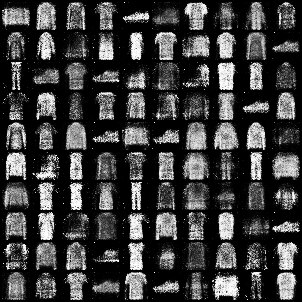

In [ ]:
# Name of the image file
image_name = 'fake_images-0055.png'

# Construct the full path to the image
image_path = os.path.join(folder_path, image_name)

# Open and display the image
image = Image.open(image_path)
display(image)


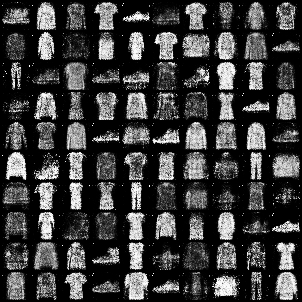

In [ ]:
# Name of the image file
image_name = 'fake_images-0070.png'

# Construct the full path to the image
image_path = os.path.join(folder_path, image_name)

# Open and display the image
image = Image.open(image_path)
display(image)


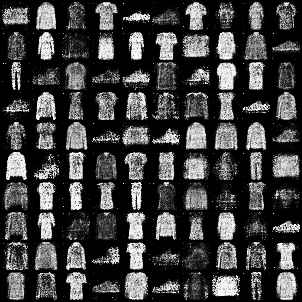

In [ ]:
# Name of the image file
image_name = 'fake_images-0080.png'

# Construct the full path to the image
image_path = os.path.join(folder_path, image_name)

# Open and display the image
image = Image.open(image_path)
display(image)


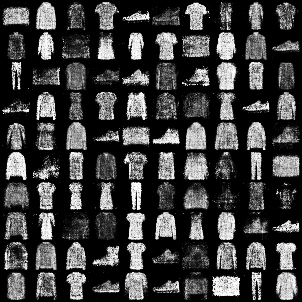

In [ ]:
# Name of the image file
image_name = 'fake_images-0100.png'

# Construct the full path to the image
image_path = os.path.join(folder_path, image_name)

# Open and display the image
image = Image.open(image_path)
display(image)


The initial image, shows generated outputs that, while having recognizable patterns, still carry a level of noise and lack in detail, indicating the GAN's ongoing learning phase. As the training progresses to the 100th epoch, there's a visible improvement in the clarity, detail, and overall quality of the generated images. This progression demonstrates the GAN's ability to refine its output through continuous learning, significantly enhancing its capacity to produce more realistic and coherent images when the epochs are more . The increase in the epochs not only aids in reducing noise but also in improving the fidelity of the images, making them closely resemble the target dataset the GAN is trained on. This evolution underscores the importance of extended training for GANs to achieve higher levels of performance in image generation tasks.

#### Losses of Discriminator and Generator

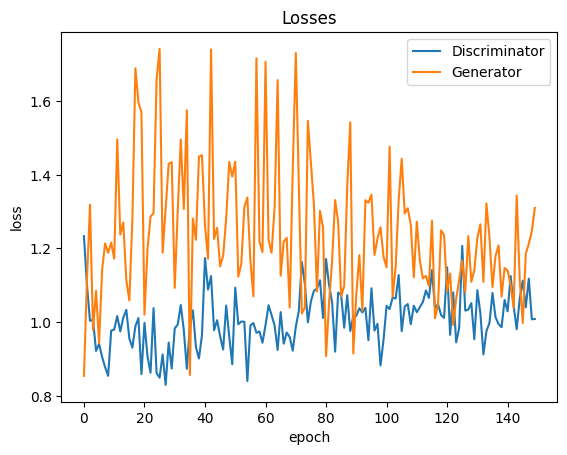

In [ ]:
plt.plot(d_losses, '-')
plt.plot(g_losses, '-')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Discriminator', 'Generator'])
plt.title('Losses');

The graph illustrates the fluctuating loss values for both the Discriminator and Generator throughout the training process. It's notable that both losses exhibit significant variability, indicating the ongoing adversarial competition between the two components of the GAN. Such fluctuations are typical in GAN training, reflecting the balance of power as both networks improve their capabilities in response to each other.

#### Real Score Vs Fake Score

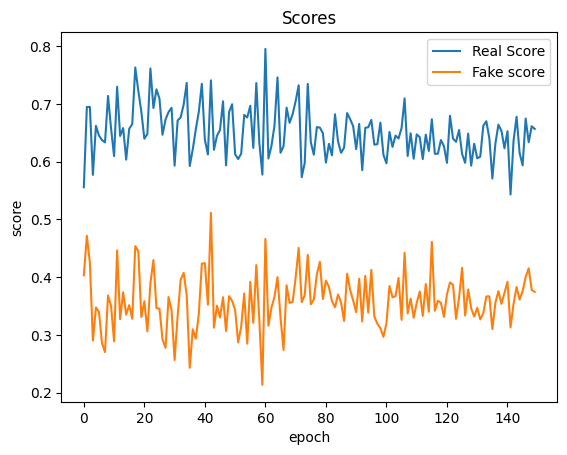

In [ ]:
plt.plot(real_scores, '-')
plt.plot(fake_scores, '-')
plt.xlabel('epoch')
plt.ylabel('score')
plt.legend(['Real Score', 'Fake score'])
plt.title('Scores');

The graph presents the real and fake scores over the same set of epochs, offering insight into the Discriminator's performance. The real score, which measures the Discriminator's ability to correctly identify real images, remains relatively stable and high, suggesting a consistent performance in recognizing genuine data. Conversely, the fake score, indicating how often the Discriminator is fooled by the Generator, shows improvement from the Generator's perspective, as it gradually increases. This suggests that the Generator is getting better at producing images that are more convincing as real, challenging the Discriminator's ability to distinguish between genuine and generated content.